<a href="https://colab.research.google.com/github/eya-methnani/PCD-zoosanitary-event-detection/blob/main/model2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.graph_objs as go
import plotly.offline as py
import numpy as np

In [3]:
import pandas as pd

# Load the dataset
data_path = '/content/drive/MyDrive/web scraping/PCD/data_new_features_cleaned.csv'
data = pd.read_csv(data_path)



In [4]:
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [5]:
!pip install virtualenv
!virtualenv venv
!source venv/bin/activate
!pip install package_name
!pip install accelerate -U

!pip install transformers[torch]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 24.3 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 1877ms
  creator CPython3Posix(dest=/content/venv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.0, setuptools==69.5.1, wheel==0.43.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
  Preparing metadata (setup.py) ... done
  Created wheel for package_name: filename=package_name-0.1-py3-none-any.whl size=1232 sha256=f6df584bba52cc3577ccbaa6868c0f323a8d99890569765b6aeb016920f385f3
  Stored in directory: /root/.cache/pip/wheels/a3/36/c4/98d928f30290fb88555f848f73093f02b67c984a45c56c3e97
Successfully built package_name
     ━━━━━━━━━━━━━━━━━━━━━━

In [6]:
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import load_dataset, Dataset


def is_about_animal_disease(text, state):
    if state == 'yes event':
        return True
    else:
        return False

# Use apply with a lambda function to create the 'labels' column based on the 'is_about_animal_disease' function
data['labels'] = data.apply(lambda row: is_about_animal_disease(row['TEXT_filtered'], row['STATE']), axis=1).astype(int)

from sklearn.model_selection import train_test_split


# Split the DataFrame into training and evaluation sets
train_df, eval_df = train_test_split(data, test_size=0.2, random_state=42)

# Convert the DataFrame into datasets.Dataset format
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)


# Initialize tokenizer and model
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize the dataset and include labels
def tokenize_function(examples):
    # Tokenize the text
    tokenized_text = tokenizer(
        examples["TEXT_filtered"],
        padding='max_length',
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )

    # Include the labels in the returned dictionary
    return {
        "input_ids": tokenized_text["input_ids"].squeeze(),
        "attention_mask": tokenized_text["attention_mask"].squeeze(),
        "labels": examples["labels"]
    }

tokenized_datasets = train_dataset.map(tokenize_function, batched=True)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/464 [00:00<?, ? examples/s]

In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/web scraping/PCD/output directory",
    per_device_train_batch_size=4,
    num_train_epochs=10,
    logging_dir="/content/drive/MyDrive/web scraping/PCD/logging",
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
    tokenizer=tokenizer,
)

# Train the model
trainer.train()


Step,Training Loss


In [ ]:
# Tokenize and preprocess the evaluation dataset
tokenized_eval_dataset = eval_dataset.map(tokenize_function, batched=True)

# Evaluate the model
eval_results = trainer.evaluate(eval_dataset=tokenized_eval_dataset)
print(eval_results)


In [ ]:
# Evaluate the model
eval_predictions = trainer.predict(tokenized_eval_dataset)

# Extract predicted labels and true labels
predicted_labels = eval_predictions.predictions.argmax(axis=1)
true_labels = tokenized_eval_dataset['labels']



In [ ]:

# Assuming eval_df is your evaluation DataFrame
# Create a new DataFrame to store predictions, true labels, and text
results_df = pd.DataFrame({
    'Text': eval_df['TEXT'],  # Assuming 'TEXT' is the column containing the text data
    'True_Labels': true_labels,
    'Predicted_Labels': predicted_labels
})

# Display the DataFrame
print(results_df)


Map:   0%|          | 0/117 [00:00<?, ? examples/s]

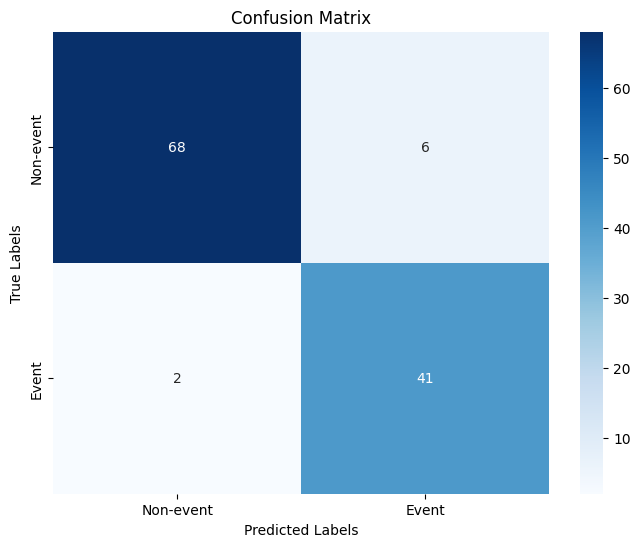

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tokenize and preprocess the evaluation dataset
tokenized_eval_dataset = eval_dataset.map(tokenize_function, batched=True)

# Get the predictions
# Get the predictions
eval_predictions = trainer.predict(tokenized_eval_dataset)
predicted_labels = np.argmax(eval_predictions.predictions, axis=1)
true_labels = tokenized_eval_dataset['labels']


# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-event', 'Event'], yticklabels=['Non-event', 'Event'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.9316239316239316
